## Nama : Adriati Manuk Allo
## NIM  : 2209106018
## Kelas: A1 22
## Posttest 6

### Import Library

In [34]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from tensorflow.keras import Sequential, layers, callbacks
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

### Membaca file CSV

In [56]:
car = pd.read_csv('ford.csv')
car

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,10999,Manual,12427,NaN,20.0,62.8,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150.0,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145.0,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.0,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,Manual,16700,Petrol,150.0,47.1,1.4
17962,B-MAX,2014,7499,Manual,40700,Petrol,30.0,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20.0,67.3,1.6
17964,KA,2018,8299,Manual,5007,Petrol,145.0,57.7,1.2


In [3]:
car["year"].value_counts()

year
2017    4889
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
Name: count, dtype: int64

### Data Cleaning

In [7]:
car.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [57]:
#Mengganti nilai null tax dengan nilai mean
si_mean = SimpleImputer(strategy='mean')
car['tax'] = si_mean.fit_transform(car[['tax']])

#Mengganti nilai null fuelType dengan nilai modus
si_most_frequent = SimpleImputer(strategy='most_frequent')
car[['fuelType']] = si_most_frequent.fit_transform(car[['fuelType']])

#Mengganti nilai null engineSize dengan nilai media
si_median = SimpleImputer(strategy='median')
car[['engineSize']] = si_median.fit_transform(car[['engineSize']])

In [9]:
car_new = car.isnull().sum()
car_new

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [10]:
car.duplicated().sum()

153

In [11]:
car_new = car.drop_duplicates(inplace = True)
car_new = car.duplicated().sum()
car_new = car

### Encoding

In [58]:
car['transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Auto'], dtype=object)

In [59]:
car['fuelType'].unique()

array(['Petrol', 'Diesel', 'Hybrid', 'Electric', 'Other'], dtype=object)

In [60]:
oe = OrdinalEncoder()
car[["transmission"]] = oe.fit_transform(car[["transmission"]])
car [["fuelType"]] = oe.fit_transform(car[["fuelType"]])
car

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,10999,1.0,12427,4.0,20.0,62.8,1.0
1,Focus,2018,14000,1.0,9083,4.0,150.0,57.7,1.0
2,Focus,2017,13000,1.0,12456,4.0,150.0,57.7,1.0
3,Fiesta,2019,17500,1.0,10460,4.0,145.0,40.3,1.5
4,Fiesta,2019,16500,0.0,1482,4.0,145.0,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-MAX,2017,8999,1.0,16700,4.0,150.0,47.1,1.4
17962,B-MAX,2014,7499,1.0,40700,4.0,30.0,57.7,1.0
17963,Focus,2015,9999,1.0,7010,0.0,20.0,67.3,1.6
17964,KA,2018,8299,1.0,5007,4.0,145.0,57.7,1.2


In [62]:
car_encoded = pd.get_dummies(car, columns=['model', 'year'])
car_encoded = car_encoded.astype(int)
car_encoded


,price,transmission,mileage,fuelType,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,...,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020
0,10999,1,12427,4,20,62,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,14000,1,9083,4,150,57,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,13000,1,12456,4,150,57,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,17500,1,10460,4,145,40,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,16500,0,1482,4,145,48,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17961,8999,1,16700,4,150,47,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
17962,7499,1,40700,4,30,57,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
17963,9999,1,7010,0,20,67,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17964,8299,1,5007,4,145,57,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17813 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17813 non-null  object 
 1   year          17813 non-null  int64  
 2   price         17813 non-null  int64  
 3   transmission  17813 non-null  float64
 4   mileage       17813 non-null  int64  
 5   fuelType      17813 non-null  float64
 6   tax           17813 non-null  float64
 7   mpg           17813 non-null  float64
 8   engineSize    17813 non-null  float64
dtypes: float64(5), int64(3), object(1)
memory usage: 1.4+ MB


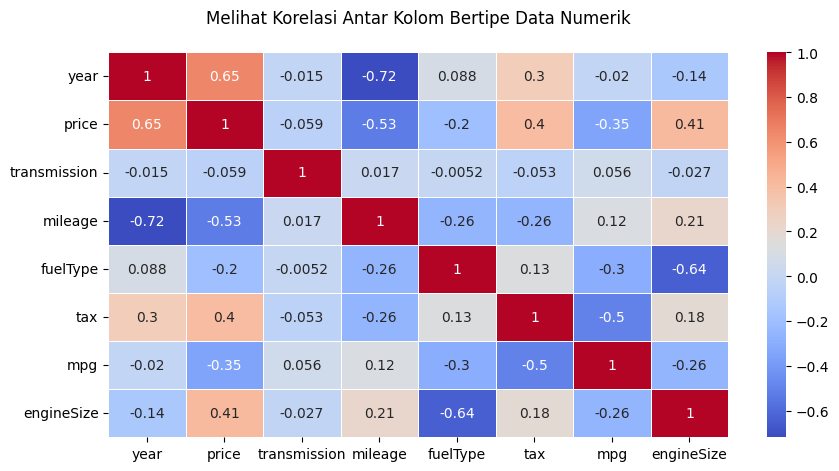

In [17]:
numerical_columns = car.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_columns.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Melihat Korelasi Antar Kolom Bertipe Data Numerik\n')
plt.show()


### Split Data

In [63]:
X = car_encoded.drop('price', axis=1)
y = car_encoded['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [65]:
X_train.shape

(14372, 52)

### Data Transformation

#### Normalisasi Data

In [20]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
np.unique(y_test)

array([  950,  1200,  1450, ..., 41000, 42999, 54995])

### Train Model

In [70]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[52]),
    tf.keras.layers.Dense(1, activation = 'linear')
])
model.compile(optimizer='adam',
             loss='mse',
             metrics = [tf.keras.metrics.RootMeanSquaredError()])

In [71]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 64)                3392      
                                                                 
 dense_24 (Dense)            (None, 1)                 65        
                                                                 
Total params: 3457 (13.50 KB)
Trainable params: 3457 (13.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
es = callbacks.EarlyStopping(
    monitor='val_root_mean_squared_error',
    patience=20,
    verbose=1,
    restore_best_weights=True
)


history = model.fit(
    x=X_train, 
    y=y_train, 
    epochs=1000, 
    verbose=1,
    callbacks=[es],
    validation_split=0.2
)

Epoch 1/1000
360/360 [==============================] - 2s 4ms/step - loss: 10451370.0000 - root_mean_squared_error: 3232.8579 - val_loss: 9604408.0000 - val_root_mean_squared_error: 3099.0979
Epoch 2/1000
360/360 [==============================] - 1s 4ms/step - loss: 10418121.0000 - root_mean_squared_error: 3227.7114 - val_loss: 10589390.0000 - val_root_mean_squared_error: 3254.1343
Epoch 3/1000
360/360 [==============================] - 1s 4ms/step - loss: 10282685.0000 - root_mean_squared_error: 3206.6626 - val_loss: 9369557.0000 - val_root_mean_squared_error: 3060.9731
Epoch 4/1000
360/360 [==============================] - 1s 4ms/step - loss: 10146518.0000 - root_mean_squared_error: 3185.3599 - val_loss: 11621969.0000 - val_root_mean_squared_error: 3409.1008
Epoch 5/1000
360/360 [==============================] - 1s 4ms/step - loss: 10154611.0000 - root_mean_squared_error: 3186.6301 - val_loss: 9140339.0000 - val_root_mean_squared_error: 3023.2993
Epoch 6/1000
360/360 [===========

In [80]:
y_pred = model.predict(X_test)
# y_pread_class = np.argmax(y_pred, axis=1)
# mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'R-squared (R²): {r2}')

113/113 [==============================] - 0s 2ms/step
R-squared (R²): 0.8611367996740622


### Visualisasi Training

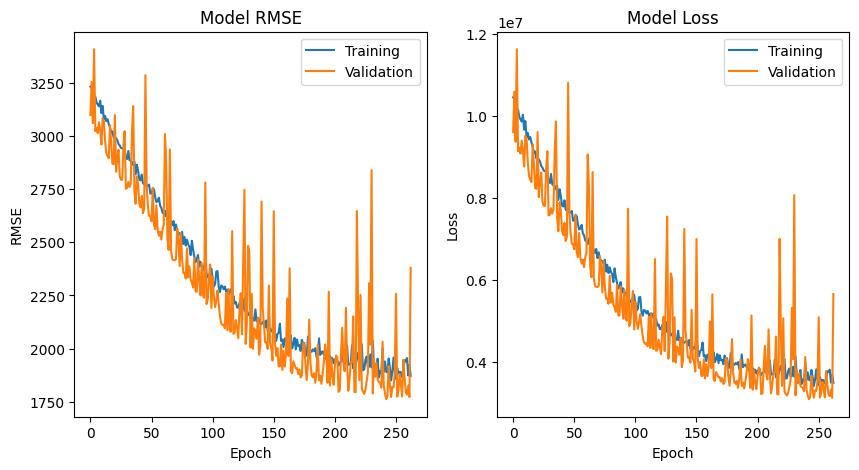

In [81]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend(['Training', 'Validation'])

print('\n')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()

plt.show()